In [1]:
%load_ext autoreload
%autoreload 2

# Multilabel

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from multiclass_helper import draw_neural_net

In [3]:
def generate_dataset(N = 200):
    N = N//4
    v = 0.08 
    X1 = np.random.multivariate_normal([-0.5, 0.5], [[v, 0], [0, v]], size = N)
    X2 = np.random.multivariate_normal([0.5, -0.5], [[v, 0], [0, v]], size = N)
    X3 = np.random.multivariate_normal([0.5, 0.5], [[v, 0], [0, v]], size = N)
    X4 = np.random.multivariate_normal([-0.5, -0.5], [[v, 0], [0, v]], size = N)
    X = np.vstack([X1, X2, X3, X4])
    y = np.vstack([
        np.array(N*[[1, 0, 1, 0]]), 
        np.array(N*[[0, 1, 0, 1]]), 
        np.array(N*[[0, 1, 1, 0]]), 
        np.array(N*[[1, 0, 0, 1]])])
    return X, y

In [4]:
X, y = generate_dataset(N = 2000)

In [5]:
X.shape, y.shape

((2000, 2), (2000, 4))

In [6]:
print(X[:10])
print(y[:10])

[[ 0.41983159  0.281273  ]
 [-0.50731471  0.55969066]
 [-0.53243614  0.04129955]
 [-0.75420134  0.26132967]
 [-0.61711115  0.6347534 ]
 [-0.86799542  0.36077917]
 [-0.52374464  0.68099429]
 [-0.66835521  0.21695383]
 [ 0.12137897  0.98005942]
 [-0.68332637  0.82297287]]
[[1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]]


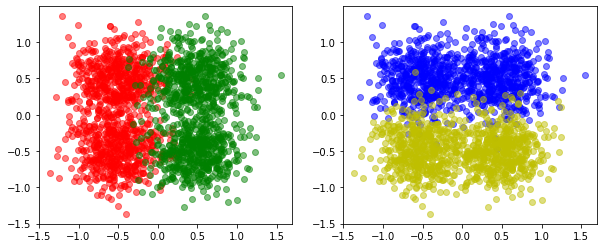

In [7]:
# [r, g, b, y]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4)) 
ax1.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='r', alpha=0.5)
ax1.scatter(X[y[:,1]==1, 0], X[y[:,1]==1, 1], c='g', alpha=0.5)
ax2.scatter(X[y[:,2]==1, 0], X[y[:,2]==1, 1], c='b', alpha=0.5)
ax2.scatter(X[y[:,3]==1, 0], X[y[:,3]==1, 1], c='y', alpha=0.5)
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

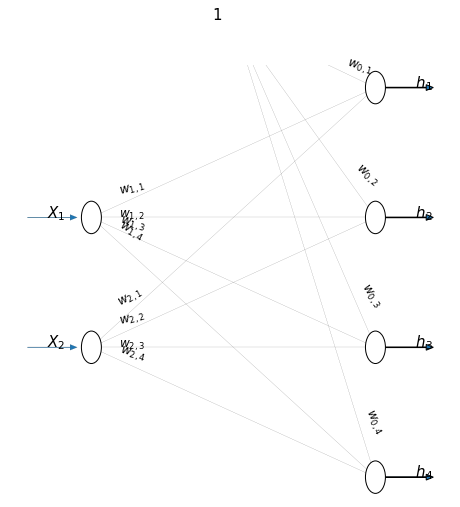

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [[ '$w_{0,1}$', '$w_{0,2}$', '$w_{0,3}$', '$w_{0,4}$']]
capa_1 = [['$w_{1,1}$', '$w_{1,2}$', '$w_{1,3}$', '$w_{1,4}$'],
          ['$w_{2,1}$', '$w_{2,2}$', '$w_{2,3}$', '$w_{2,4}$'], 
          ['$w_{3,1}$', '$w_{3,2}$', '$w_{3,3}$', '$w_{3,4}$']]
weights = [np.array(capa_1)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,4], weights, biases)
plt.show()

In [10]:
hidden_units = 20
input_features=2
output_size = y.shape[1]
model = Sequential()
layer_a = Dense(output_size, name="Salida", activation='sigmoid', input_shape=(2, ))
model.add(layer_a)
model.summary()


lr = 0.05 
# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 20
epochs = 100

model.fit(X, y, epochs=epochs)

Epoch 1/100
63/63 [==============================] - 0s 714us/step - loss: 2.1295 - accuracy: 0.5840
Epoch 2/100
63/63 [==============================] - 0s 701us/step - loss: 1.7549 - accuracy: 0.5440
Epoch 3/100
63/63 [==============================] - 0s 683us/step - loss: 1.7055 - accuracy: 0.5300
Epoch 4/100
63/63 [==============================] - 0s 699us/step - loss: 1.6739 - accuracy: 0.5320
Epoch 5/100
63/63 [==============================] - 0s 731us/step - loss: 1.6546 - accuracy: 0.5340
Epoch 6/100
63/63 [==============================] - 0s 651us/step - loss: 1.6419 - accuracy: 0.5340
Epoch 7/100
63/63 [==============================] - 0s 667us/step - loss: 1.6334 - accuracy: 0.5360
Epoch 8/100
63/63 [==============================] - 0s 858us/step - loss: 1.6273 - accuracy: 0.5310
Epoch 9/100
63/63 [==============================] - 0s 763us/step - loss: 1.6222 - accuracy: 0.5325
Epoch 10/100
63/63 [==============================] - 0s 715us/step - loss: 1.6190 - accura

In [14]:
layer_a.set_weights([coefs_, intercept_])

In [16]:
layer_a.get_weights()

[array([[-10.021508  ,   9.780544  ,  -0.3323118 ,   0.35372728],
        [  0.13239847,  -0.1332541 ,   8.324003  ,  -8.686057  ]],
       dtype=float32),
 array([ 0.19760127, -0.18874079,  0.03835499, -0.04586953], dtype=float32)]

In [12]:
coefs_ = np.array([
[-10.021508 , 9.780544 , -0.3323118 , 0.35372728],
[ 0.13239847, -0.1332541 , 8.324003 , -8.686057 ]
], dtype = float)

In [13]:
intercept_ = np.array([0.19760127, -0.18874079, 0.03835499, -0.04586953], dtype = float)

In [21]:
# [r, g, b, y]
model.predict(np.array([[0.5, 0.5]]))

array([[5.4394703e-05, 6.4572221e-01, 3.5413057e-01, 9.2868606e-05]],
      dtype=float32)

In [17]:
model.predict(np.array([[0.5, 0.5]]))

array([[0.00860339, 0.99038625, 0.98260796, 0.01459989]], dtype=float32)

In [18]:
1-(0.990+0.982+0.0145)

-0.9864999999999999

In [24]:
model.evaluate(np.array([[0.5, 0.5]]), np.array([[0, 1, 1, 0]]))

1/1 [==============================] - 0s 740us/step - loss: 0.0023 - accuracy: 1.0000


[0.0023358440957963467, 1.0]

In [25]:
model.predict_proba(np.array([[0.5, 0.5]]))

array([[0.00179479, 0.99820536, 0.99712884, 0.00287136]], dtype=float32)

In [26]:
coefs_, intercept_ = model.get_weights()

In [27]:
coefs_

array([[-12.318755  ,  12.318894  ,  -0.05021025,   0.05021169],
       [  0.11165709,  -0.11165001,  12.186125  , -12.185939  ]],
      dtype=float32)

In [28]:
intercept_

array([-0.21753998,  0.21750538, -0.21777019,  0.2177669 ], dtype=float32)

In [29]:
(-np.log(1-0.00860339) - np.log(0.99038637) - np.log(0.982608) - np.log(1-0.01459989))/4

0.012638321732369315